In [15]:
# Imports

%matplotlib inline  
import pickle
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
from matplotlib.collections import LineCollection
import skfuzzy as fuzz
from skfuzzy import control as ctrl

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [2]:
#Constants and Vars
DATA_FOLDER = 'hwd_data'
CITY_DATA_FILES = ["{}/df/{}".format(DATA_FOLDER, f) for f in
                   ['run_15.csv', 'run_16.csv', 'run_17.csv']]
HWY_DATA_FILES = ["{}/df/{}".format(DATA_FOLDER, f) for f in
                 ['run_18.csv', 'run_19.csv']]

# STEERING_CONST = -5.0

In [3]:
city_df = pd.concat((pd.read_csv(f) for f in CITY_DATA_FILES))

In [4]:
hwy1 = pd.read_csv(HWY_DATA_FILES[0])
hwy_df = hwy1[50:811]
hwy_df = hwy_df.append(hwy1[894:908])
city_df = city_df.append(hwy1[0:50])
city_df = city_df.append(hwy1[812:894])
city_df = city_df.append(hwy1[908:])

# HWY=50:811,894:908
# CITY=0:50,812:894, 908:

In [5]:
city_df['hwy'] = 0
hwy_df['hwy'] = 1
# cols = [col for col in hwy_df.columns if col in ['speed', 'engine_load', 'throttle', 'hwy']]
cols = ['speed', 'engine_load', 'throttle']
all_df = pd.concat([city_df, hwy_df]).sample(frac=1)
x_df = all_df[cols]
y_df = all_df['hwy']

In [6]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_df, y_df)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:

clf.predict([[71,0.2,0.2]])

array([0])

In [17]:
# SAVE MODEL
with open('models/hwy_classifier.p', 'wb') as handle:
    pickle.dump(clf, handle, protocol=3)

In [8]:
cv_scores = cross_validation.cross_val_score(clf,x_df,y_df,cv=10)
cv_preds = cross_validation.cross_val_predict(clf,x_df,y_df,cv =10)

NameError: name 'cross_validation' is not defined

In [11]:
k_fold = KFold(n_splits=3)

In [13]:
cross_val_score(clf, x_df, y_df, cv=k_fold, n_jobs=-1)

array([ 0.94615385,  0.93846154,  0.94087404])

In [111]:
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(x_df):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 390  391  392  393  394  395  396  397  398  399  400  401  402  403  404
  405  406  407  408  409  410  411  412  413  414  415  416  417  418  419
  420  421  422  423  424  425  426  427  428  429  430  431  432  433  434
  435  436  437  438  439  440  441  442  443  444  445  446  447  448  449
  450  451  452  453  454  455  456  457  458  459  460  461  462  463  464
  465  466  467  468  469  470  471  472  473  474  475  476  477  478  479
  480  481  482  483  484  485  486  487  488  489  490  491  492  493  494
  495  496  497  498  499  500  501  502  503  504  505  506  507  508  509
  510  511  512  513  514  515  516  517  518  519  520  521  522  523  524
  525  526  527  528  529  530  531  532  533  534  535  536  537  538  539
  540  541  542  543  544  545  546  547  548  549  550  551  552  553  554
  555  556  557  558  559  560  561  562  563  564  565  566  567  568  569
  570  571  572  573  574  575  576  577  578  579  580  581  582  583  584
  585

In [114]:
[clf.fit(x_df[train], y_df[train]).score(x_df[test], y_df[test])
    for train, test in k_fold.split(x_df)]

KeyError: '[ 390  391  392  393  394  395  396  397  398  399  400  401  402  403  404\n  405  406  407  408  409  410  411  412  413  414  415  416  417  418  419\n  420  421  422  423  424  425  426  427  428  429  430  431  432  433  434\n  435  436  437  438  439  440  441  442  443  444  445  446  447  448  449\n  450  451  452  453  454  455  456  457  458  459  460  461  462  463  464\n  465  466  467  468  469  470  471  472  473  474  475  476  477  478  479\n  480  481  482  483  484  485  486  487  488  489  490  491  492  493  494\n  495  496  497  498  499  500  501  502  503  504  505  506  507  508  509\n  510  511  512  513  514  515  516  517  518  519  520  521  522  523  524\n  525  526  527  528  529  530  531  532  533  534  535  536  537  538  539\n  540  541  542  543  544  545  546  547  548  549  550  551  552  553  554\n  555  556  557  558  559  560  561  562  563  564  565  566  567  568  569\n  570  571  572  573  574  575  576  577  578  579  580  581  582  583  584\n  585  586  587  588  589  590  591  592  593  594  595  596  597  598  599\n  600  601  602  603  604  605  606  607  608  609  610  611  612  613  614\n  615  616  617  618  619  620  621  622  623  624  625  626  627  628  629\n  630  631  632  633  634  635  636  637  638  639  640  641  642  643  644\n  645  646  647  648  649  650  651  652  653  654  655  656  657  658  659\n  660  661  662  663  664  665  666  667  668  669  670  671  672  673  674\n  675  676  677  678  679  680  681  682  683  684  685  686  687  688  689\n  690  691  692  693  694  695  696  697  698  699  700  701  702  703  704\n  705  706  707  708  709  710  711  712  713  714  715  716  717  718  719\n  720  721  722  723  724  725  726  727  728  729  730  731  732  733  734\n  735  736  737  738  739  740  741  742  743  744  745  746  747  748  749\n  750  751  752  753  754  755  756  757  758  759  760  761  762  763  764\n  765  766  767  768  769  770  771  772  773  774  775  776  777  778  779\n  780  781  782  783  784  785  786  787  788  789  790  791  792  793  794\n  795  796  797  798  799  800  801  802  803  804  805  806  807  808  809\n  810  811  812  813  814  815  816  817  818  819  820  821  822  823  824\n  825  826  827  828  829  830  831  832  833  834  835  836  837  838  839\n  840  841  842  843  844  845  846  847  848  849  850  851  852  853  854\n  855  856  857  858  859  860  861  862  863  864  865  866  867  868  869\n  870  871  872  873  874  875  876  877  878  879  880  881  882  883  884\n  885  886  887  888  889  890  891  892  893  894  895  896  897  898  899\n  900  901  902  903  904  905  906  907  908  909  910  911  912  913  914\n  915  916  917  918  919  920  921  922  923  924  925  926  927  928  929\n  930  931  932  933  934  935  936  937  938  939  940  941  942  943  944\n  945  946  947  948  949  950  951  952  953  954  955  956  957  958  959\n  960  961  962  963  964  965  966  967  968  969  970  971  972  973  974\n  975  976  977  978  979  980  981  982  983  984  985  986  987  988  989\n  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003 1004\n 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019\n 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034\n 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049\n 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064\n 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079\n 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094\n 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109\n 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124\n 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139\n 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154\n 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168] not in index'

In [50]:
# Preprocess CSV file from Unity Simulator
def preprocess(data_file):
    df = pd.read_csv(data_file,header=None, names=['date', 'steering', 'throttle', 'brake', 'velocity', 'rpm', 'torque'])
    df['date'] = df['date'].apply(lambda x: int(datetime.strptime(x, '%Y_%m_%d_%H_%M_%S_%f').timestamp()*1000))
    df['time'] = (df.date - df.date.iloc[0])/1000.0
    df['time_diff'] = df.time.diff()
    
    return df

In [4]:
data = preprocess(DATA_FILE)

# Add dimensions needed to track position
data['distance'] = data.velocity * data.time_diff
data['rel_steering'] = data.steering * STEERING_CONST * data.distance
data['abs_steering'] = data.rel_steering.cumsum()
data['rel_x'] = np.cos(np.deg2rad(data.abs_steering)) * data.distance
data['rel_y'] = np.sin(np.deg2rad(data.abs_steering)) * data.distance
data['abs_x'] = data.rel_x.cumsum()
data['abs_y'] = data.rel_y.cumsum()

In [5]:
class aggFuzzyLogic:
    def __init__(self):
        x_velocity = np.arange(0, 100.1, 0.1)
        x_throttle = np.arange(0, 1.01, 0.01)
        x_aggressiveness  = np.arange(-4, 5, 1)

        # Generate fuzzy membership functions
        vel_lo = fuzz.trimf(x_velocity, [0, 0, 40])
        vel_md = fuzz.trimf(x_velocity, [15, 50, 85])
        vel_hi = fuzz.trimf(x_velocity, [60, 100, 100])
        throttle_lo = fuzz.trimf(x_throttle, [0, 0, 0.4])
        throttle_md = fuzz.trimf(x_throttle, [0.2, 0.5, 0.8])
        throttle_hi = fuzz.trimf(x_throttle, [0.6, 1.0, 1.0])
        aggressive_LN = fuzz.trimf(x_aggressiveness, [-4, -4, -2])
        aggressive_N = fuzz.trimf(x_aggressiveness, [-3, -2, -1])
        aggressive_M = fuzz.trimf(x_aggressiveness, [-2, 0, 2 ])
        aggressive_A = fuzz.trimf(x_aggressiveness, [1, 2, 3])
        aggressive_HA = fuzz.trimf(x_aggressiveness, [2, 3, 4])
        velocity = ctrl.Antecedent(x_velocity, 'velocity')
        throttle = ctrl.Antecedent(x_throttle, 'throttle')
        aggressiveness = ctrl.Consequent(x_aggressiveness, 'aggressiveness')
        velocity.automf(names=['L', 'M', 'H'])
        throttle.automf(names=['L', 'M', 'H'])
        aggressiveness.automf(names=['LN', 'N', 'M', 'A', 'HA'])

        rule1 = ctrl.Rule(velocity['L'] & throttle['L'], aggressiveness['LN'])
        rule2 = ctrl.Rule(velocity['L'] & throttle['M'], aggressiveness['M'])
        rule3 = ctrl.Rule(velocity['L'] & throttle['H'], aggressiveness['HA'])
        rule4 = ctrl.Rule(velocity['M'] & throttle['L'], aggressiveness['N'])
        rule5 = ctrl.Rule(velocity['M'] & throttle['M'], aggressiveness['M'])
        rule6 = ctrl.Rule(velocity['M'] & throttle['H'], aggressiveness['A'])
        rule7 = ctrl.Rule(velocity['H'] & throttle['L'], aggressiveness['HA'])
        rule8 = ctrl.Rule(velocity['H'] & throttle['M'], aggressiveness['A'])
        rule9 = ctrl.Rule(velocity['H'] & throttle['H'], aggressiveness['HA'])

        system = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
        self.agg_simulator = ctrl.ControlSystemSimulation(system)
        
    def compute(self, velocity_input, throttle_input):
        self.agg_simulator.input['velocity'] = velocity_input
        self.agg_simulator.input['throttle'] = throttle_input
        self.agg_simulator.compute()
        return self.agg_simulator.output['aggressiveness']

In [11]:
# OPTIONAL: Output processed csv file

data.to_csv('data.csv')

In [6]:
aggressiveness = aggFuzzyLogic()

data['aggressiveness'] = data.apply(lambda row: aggressiveness.compute(row['velocity'], row['throttle']), axis=1)



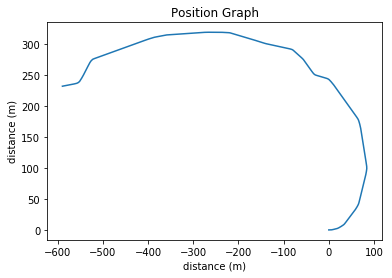

In [12]:
# Plot path (x,y)
plt.figure()
plt.title('Position Graph')
plt.ylabel('distance (m)')
plt.xlabel('distance (m)')
plt.plot(data.abs_x, data.abs_y)

Text(0.5,0,'time (s)')

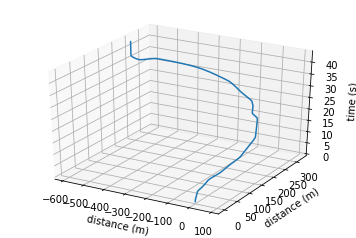

In [13]:
# Position vs. Time graph

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs=data.abs_x, ys=data.abs_y, zs=data.time)
ax.set_xlabel('distance (m)')
ax.set_ylabel('distance (m)')
ax.set_zlabel('time (s)')

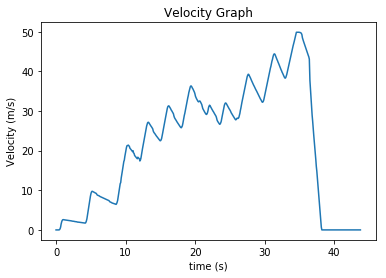

In [14]:
plt.figure()
plt.title('Velocity Graph')
plt.ylabel('Velocity (m/s)')
plt.xlabel('time (s)')
plt.plot(data.time, data.velocity)

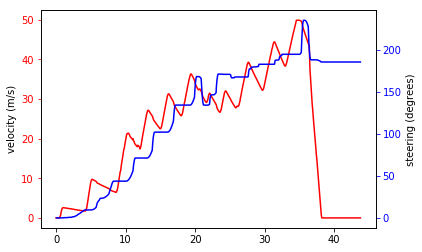

In [15]:
# Subplots with velocity & steering vs time
fig, ax = plt.subplots()

axes = [ax, ax.twinx()]
dp = [data.time, data.time]
dp2 = [data.velocity, data.abs_steering]
y_axis = ["velocity (m/s)", "steering (degrees)"]

colors = ('Red', 'Blue')
for ax, color, d, d2, y in zip(axes, colors, dp, dp2, y_axis):
    ax.plot(d, d2, color=color)
    ax.set_ylabel(y)
    ax.tick_params(axis='y', colors=color)
plt.show()

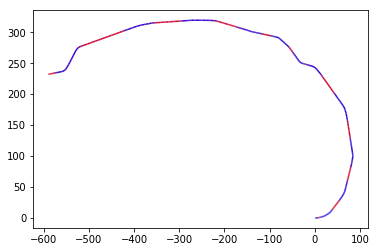

In [7]:
# Position Graph with custom colormap for aggressiveness (fuzzy logic of velocity & throttle)

# cm = plt.get_cmap('cool') 
cdict = {'red':   [(0.0,  0.0, 0.0),
#                    (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  0.0, 0.0),
#                    (0.25, 0.0, 0.0),
#                    (0.75, 1.0, 1.0),
                   (1.0,  0.0, 0.0)],

         'blue':  [(0.0,  1.0, 1.0),
#                    (0.5,  1.0, 1.0),
#                    (0.75,  0.0, 0.0),
                   (1.0,  0.0, 0.0)]}

# cm = cpl.LinearSegmentedColormap.from_list("", ["blue","violet","red"])
cm = cpl.LinearSegmentedColormap("", cdict)
cNorm  = cpl.Normalize(vmin=-3.4, vmax=3.4)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

xy = [[xx, yy] for (xx,yy) in zip(data.abs_x, data.abs_y)]#(data.abs_x, data.abs_y)

xy = [ [x0, x1] for x0, x1 in zip(xy[:-1], xy[1:])]
cSegments = [scalarMap.to_rgba(c) for c in data.aggressiveness]
fig, ax = plt.subplots()
coll = LineCollection(xy, color=cSegments)

ax.add_collection(coll)
ax.autoscale_view()

plt.show()

In [10]:
data

,date,steering,throttle,brake,velocity,rpm,torque,time,time_diff,distance,rel_steering,abs_steering,rel_x,rel_y,abs_x,abs_y,agg
0,1510954602394,0.000000,0.000000,0.000000,4.484198e-06,2.114985e-07,2000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.333333
1,1510954602464,0.000000,0.000000,0.000000,1.634813e-06,2.063326e-07,2000,0.070,0.070,1.144369e-07,-0.000000,0.000000,1.144369e-07,0.000000,1.144369e-07,0.000000,-3.333333
2,1510954602532,0.000000,0.000000,0.000000,5.167260e-06,1.862830e-07,2000,0.138,0.068,3.513737e-07,-0.000000,0.000000,3.513737e-07,0.000000,4.658106e-07,0.000000,-3.333333
3,1510954602614,0.000000,0.000000,0.000000,1.895535e-06,1.711031e-07,2000,0.220,0.082,1.554339e-07,-0.000000,0.000000,1.554339e-07,0.000000,6.212445e-07,0.000000,-3.333333
4,1510954602684,0.000000,0.000000,0.000000,9.427592e-07,1.517557e-07,2000,0.290,0.070,6.599314e-08,-0.000000,0.000000,6.599314e-08,0.000000,6.872376e-07,0.000000,-3.333333
5,1510954602765,0.000000,0.000000,0.000000,1.177194e-06,1.256012e-07,2000,0.371,0.081,9.535271e-08,-0.000000,0.000000,9.535271e-08,0.000000,7.825903e-07,0.000000,-3.333333
6,1510954602839,0.000000,0.000000,0.000000,2.235243e-07,9.704677e-08,2000,0.445,0.074,1.654080e-08,-0.000000,0.000000,1.654080e-08,0.000000,7.991311e-07,0.000000,-3.333333
7,1510954602919,0.000000,0.214662,0.000000,1.221688e-01,1.516433e-03,1920,0.525,0.080,9.773504e-03,-0.000000,0.000000,9.773504e-03,0.000000,9.774303e-03,0.000000,-1.224706
8,1510954602985,0.000000,0.387723,0.000000,3.402332e-01,4.583971e-03,1960,0.591,0.066,2.245539e-02,-0.000000,0.000000,2.245539e-02,0.000000,3.222969e-02,0.000000,-0.541905
9,1510954603052,0.000000,0.589509,0.000000,7.244688e-01,1.142287e-02,1900,0.658,0.067,4.853941e-02,-0.000000,0.000000,4.853941e-02,0.000000,8.076910e-02,0.000000,0.450652
